In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anyamaurya11256","key":"fb3d23339b93970632b5231975ac9ea9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
!unzip -q fruits-fresh-and-rotten-for-classification.zip -d fruits_data

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.57G/3.58G [00:44<00:00, 98.7MB/s]
100% 3.58G/3.58G [00:44<00:00, 86.2MB/s]


In [ ]:
!ls fruits_data

dataset


In [ ]:
!ls fruits_data/dataset

dataset  test  train


In [ ]:
!ls fruits_data/dataset/train

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load one fresh and one rotten apple image
fresh_path = "fruits_data/dataset/train/freshapples/image_10.jpg"
rotten_path = "fruits_data/dataset/train/rottenapples/image_100.jpg"

# Read images
fresh = cv2.imread(fresh_path)
rotten = cv2.imread(rotten_path)

# Convert from BGR (OpenCV default) to RGB
fresh_rgb = cv2.cvtColor(fresh, cv2.COLOR_BGR2RGB)
rotten_rgb = cv2.cvtColor(rotten, cv2.COLOR_BGR2RGB)

# Show both images
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(fresh_rgb)
plt.title("Fresh Apple")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotten_rgb)
plt.title("Rotten Apple")
plt.axis("off")

plt.show()

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
!ls fruits_data/dataset/train

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


In [ ]:
!ls fruits_data/dataset/train/freshapples | head -10

rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 4.59.57 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.00.03 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.00.12 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.00.18 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.00.26 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.00.50 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.01.08 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.01.15 PM.png


In [ ]:
!ls fruits_data/dataset/train/rottenapples | head -10

rotated_by_15_Screen Shot 2018-06-07 at 2.15.20 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.15.34 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.15.50 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.16.54 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.17.15 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.17.25 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.18.13 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.18.57 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.19.15 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.19.46 PM.png


Fresh: fruits_data/dataset/train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.03.26 PM.png
Rotten: fruits_data/dataset/train/rottenapples/rotated_by_45_Screen Shot 2018-06-08 at 2.51.09 PM.png


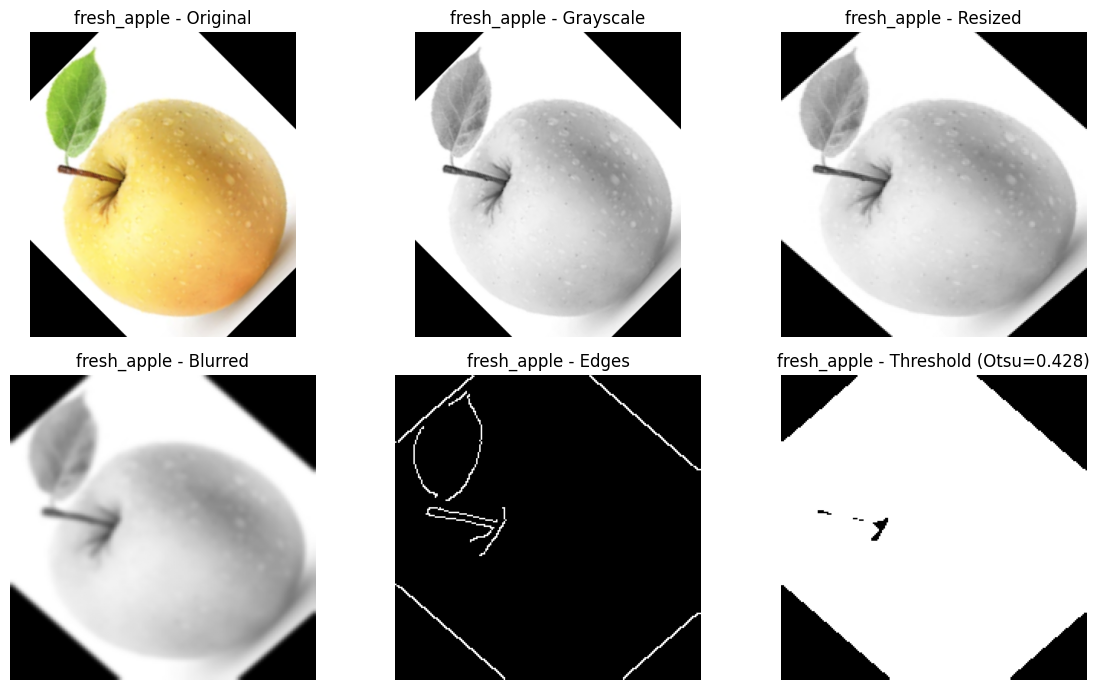

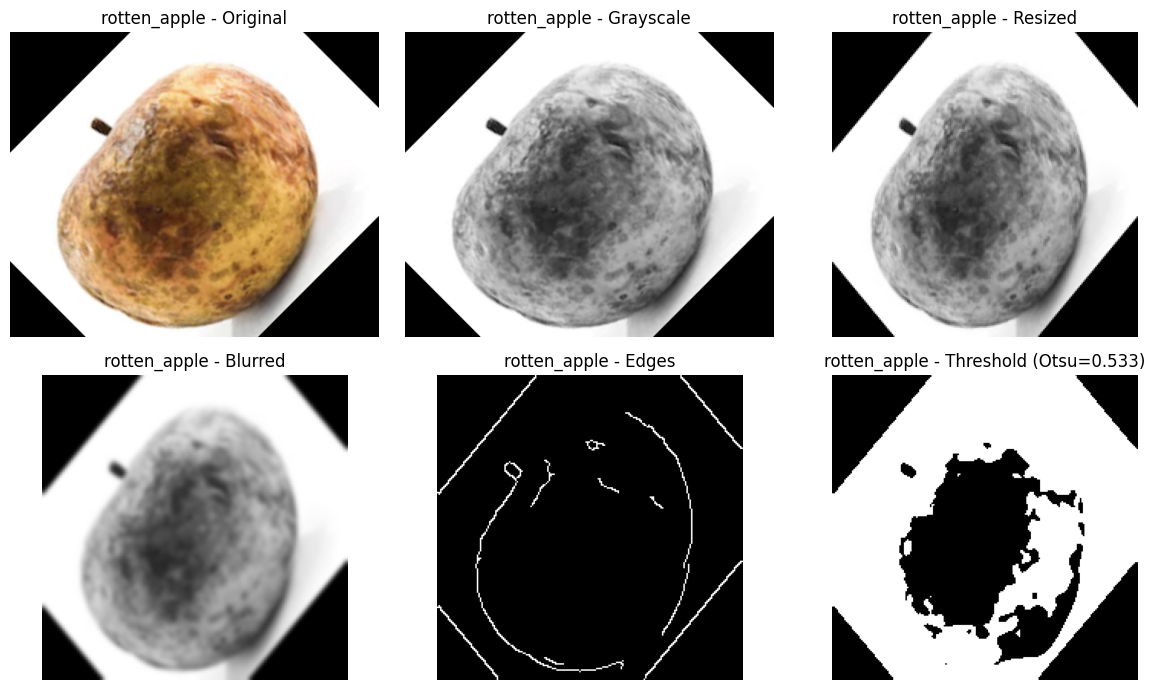

{'otsu_fresh': 0.427734375, 'otsu_rotten': 0.533203125}
Saved PPT images in folder: ppt_images/


In [ ]:
import glob, random, os, cv2, numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters

# 1) Pick real files (works for .png/.jpg/.jpeg)
fresh_list  = sorted(glob.glob("fruits_data/dataset/train/freshapples/*.*"))
rotten_list = sorted(glob.glob("fruits_data/dataset/train/rottenapples/*.*"))
assert len(fresh_list)>0 and len(rotten_list)>0, "No images found. Check paths."

fresh_path  = random.choice(fresh_list)
rotten_path = random.choice(rotten_list)
print("Fresh:", fresh_path)
print("Rotten:", rotten_path)

# 2) Load + convert to RGB
fresh_bgr  = cv2.imread(fresh_path);  assert fresh_bgr is not None, "Fresh read failed"
rotten_bgr = cv2.imread(rotten_path); assert rotten_bgr is not None, "Rotten read failed"
fresh_rgb  = cv2.cvtColor(fresh_bgr,  cv2.COLOR_BGR2RGB)
rotten_rgb = cv2.cvtColor(rotten_bgr, cv2.COLOR_BGR2RGB)

def preprocess(img_rgb, size=(200,200)):
    gray = color.rgb2gray(img_rgb)                             # float [0,1]
    resized = cv2.resize((gray*255).astype(np.uint8), size)    # uint8
    blurred = cv2.GaussianBlur(resized, (7,7), 0)              # uint8
    edges = cv2.Canny(blurred, 100, 200)                       # uint8
    thr = filters.threshold_otsu(blurred.astype(np.float32)/255.0)
    binary = ((blurred/255.0) > thr).astype(np.uint8)*255      # uint8
    return gray, resized, blurred, edges, binary, float(thr)

def show_and_save(prefix, img_rgb):
    gray, resized, blurred, edges, binary, thr = preprocess(img_rgb)
    steps = [("original", img_rgb), ("gray", gray), ("resized", resized),
             ("blurred", blurred), ("edges", edges), (f"threshold_{thr:.3f}", binary)]

    # grid
    titles = ["Original","Grayscale","Resized","Blurred","Edges",f"Threshold (Otsu={thr:.3f})"]
    imgs = [img_rgb, gray, resized, blurred, edges, binary]
    plt.figure(figsize=(12,7))
    for i,(im,ttl) in enumerate(zip(imgs,titles), start=1):
        plt.subplot(2,3,i)
        plt.imshow(im, cmap='gray' if im.ndim==2 else None)
        plt.title(prefix + " - " + ttl); plt.axis('off')
    plt.tight_layout(); plt.show()

    # save each step for PPT
    os.makedirs("ppt_images", exist_ok=True)
    for name,im in steps:
        out = f"ppt_images/{prefix}_{name}.png"
        if im.ndim==2:
            cv2.imwrite(out, im)
        else:
            cv2.imwrite(out, cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
    return thr

fresh_thr  = show_and_save("fresh_apple",  fresh_rgb)
rotten_thr = show_and_save("rotten_apple", rotten_rgb)

print({"otsu_fresh": fresh_thr, "otsu_rotten": rotten_thr})
print("Saved PPT images in folder: ppt_images/")


In [ ]:
# === ADVANCED PREPROCESSING ===
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

print("✅ Advanced Data Augmentation Applied Successfully")


✅ Advanced Data Augmentation Applied Successfully


In [ ]:
# === TRANSFER LEARNING MODEL (VGG16 FEATURE EXTRACTOR) ===
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze convolutional base

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH = 32
SEED = 42
TRAIN_DIR = "fruits_data/dataset/train"
VAL_DIR   = "fruits_data/dataset/test"   # using test as validation set here
CLASSES = ["freshapples", "rottenapples"]

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH,
    classes=CLASSES, class_mode='binary', shuffle=True, seed=SEED
)
val_gen = val_datagen.flow_from_directory(
    VAL_DIR, target_size=IMG_SIZE, batch_size=BATCH,
    classes=CLASSES, class_mode='binary', shuffle=False
)
print("Class indices:", train_gen.class_indices)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Class indices: {'freshapples': 0, 'rottenapples': 1}


In [ ]:
import gc, os, glob, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.keras.backend.clear_session(); gc.collect()
print("GPU:", tf.config.list_physical_devices('GPU'))


GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# If you already have /content/fruits_data from earlier in this session, skip this cell.
from google.colab import files
print("Upload kaggle.json (Account -> Create API Token)")
files.upload()

!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification -p /content
!unzip -q /content/fruits-fresh-and-rotten-for-classification.zip -d /content/fruits_data
!ls -R /content/fruits_data | head -40


Upload kaggle.json (Account -> Create API Token)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.58G/3.58G [00:40<00:00, 70.1MB/s]
100% 3.58G/3.58G [00:40<00:00, 95.5MB/s]
/content/fruits_data:
dataset

/content/fruits_data/dataset:
dataset
test
train

/content/fruits_data/dataset/dataset:
test
train

/content/fruits_data/dataset/dataset/test:
freshapples
freshbanana
freshoranges
rottenapples
rottenbanana
rottenoranges

/content/fruits_data/dataset/dataset/test/freshapples:
rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.00.35 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.00.43 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.01.01 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.02.08 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.02.54 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.03.47 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.04.42 PM.png
rotated_by_15_Screen 

In [ ]:
# The dataset sometimes ends up as /content/fruits_data/dataset or /content/fruits_data/dataset/dataset
candidates = [
    "/content/fruits_data/dataset",
    "/content/fruits_data/dataset/dataset",
]
BASE = next((p for p in candidates if os.path.isdir(p)), None)
assert BASE, "Dataset folder not found. Re-run unzip above."

TRAIN_DIR = os.path.join(BASE, "train")
VAL_DIR   = os.path.join(BASE, "test")
CLASSES   = ["freshapples","rottenapples"]

def count_images(p): return len(glob.glob(os.path.join(p, "*.*")))
print("BASE:", BASE)
for c in CLASSES:
    print(f"{c:13s} | train={count_images(os.path.join(TRAIN_DIR,c))}  val={count_images(os.path.join(VAL_DIR,c))}")


BASE: /content/fruits_data/dataset
freshapples   | train=1693  val=395
rottenapples  | train=2342  val=601


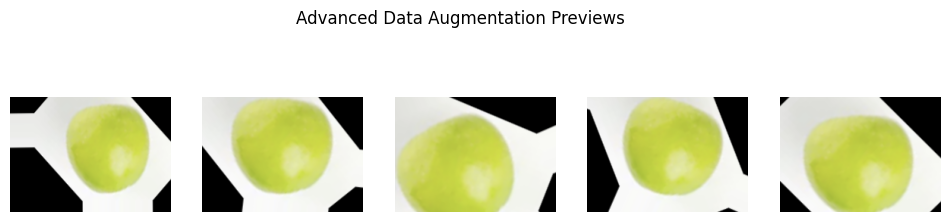

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)
sample_path = glob.glob(os.path.join(TRAIN_DIR,"freshapples","*"))[0]
from tensorflow.keras.utils import load_img, img_to_array
x = img_to_array(load_img(sample_path)); x = np.expand_dims(x,0)

plt.figure(figsize=(12,3))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(1,5,i+1); plt.imshow(batch[0]); plt.axis('off')
    if i==4: break
plt.suptitle("Advanced Data Augmentation Previews"); plt.show()


In [ ]:
import cv2


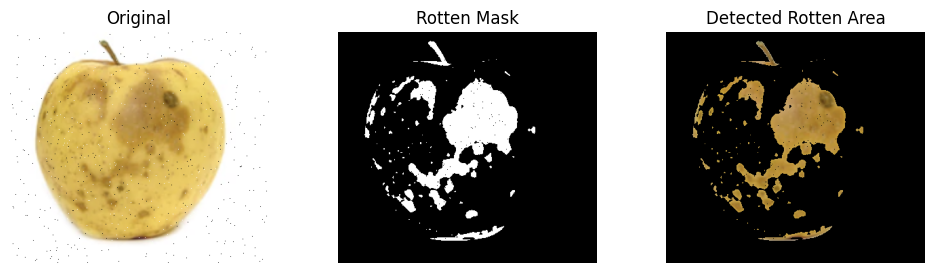

In [ ]:
rotten_sample = glob.glob(os.path.join(TRAIN_DIR,"rottenapples","*"))[0]
img = cv2.imread(rotten_sample); img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Brown-ish mask (tunable)
lower_brown, upper_brown = (10,50,20), (30,255,200)
mask = cv2.inRange(hsv, lower_brown, upper_brown)
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(12,3))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask, cmap='gray'); plt.title("Rotten Mask"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(result); plt.title("Detected Rotten Area"); plt.axis("off")
plt.show()


In [ ]:
IMG_SIZE=(224,224); BATCH=32; SEED=42
train_gen = datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH,
    classes=CLASSES, class_mode='binary', shuffle=True, seed=SEED
)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    VAL_DIR, target_size=IMG_SIZE, batch_size=BATCH,
    classes=CLASSES, class_mode='binary', shuffle=False
)
print("Loaded:", train_gen.samples, "train;", val_gen.samples, "val")


Found 4035 images belonging to 2 classes.
Found 996 images belonging to 2 classes.
Loaded: 4035 train; 996 val


In [ ]:
from tensorflow.keras.applications import VGG16


In [ ]:
base = VGG16(weights='imagenet', include_top=False, input_shape=IMG_SIZE+(3,))
base.trainable = False

inp = layers.Input(shape=IMG_SIZE+(3,))
x = base(inp, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
out = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inp, out)

model.compile(optimizer=optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_gen, validation_data=val_gen,
    epochs=3,
    steps_per_epoch=min(len(train_gen), 120),
    validation_steps=min(len(val_gen), 40),
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
120/120 ━━━━━━━━━━━━━━━━━━━━ 85s 584ms/step - accuracy: 0.5153 - loss: 0.7058 - val_accuracy: 0.6145 - val_loss: 0.5924
Epoch 2/3
  7/120 ━━━━━━━━━━━━━━━━━━━━ 30s 266ms/step - accuracy: 0.6252 - loss: 0.6158

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.6082 - loss: 0.6338 - val_accuracy: 0.6054 - val_loss: 0.5890
Epoch 3/3
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 525ms/step - accuracy: 0.6899 - loss: 0.5900 - val_accuracy: 0.8584 - val_loss: 0.5007


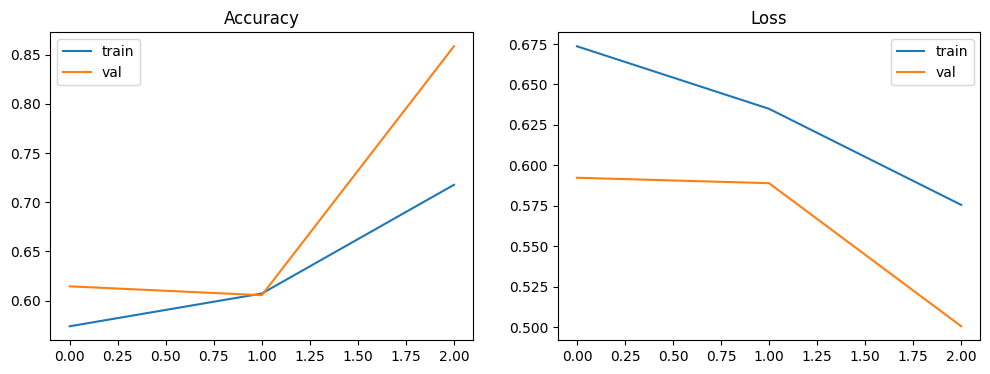

Validation Accuracy: 0.858


In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy'])
plt.title('Accuracy'); plt.legend(['train','val'])
plt.subplot(1,2,2); plt.plot(history.history['loss']); plt.plot(history.history['val_loss'])
plt.title('Loss'); plt.legend(['train','val']); plt.show()

val_loss, val_acc = model.evaluate(val_gen, verbose=0)
print(f"Validation Accuracy: {val_acc:.3f}")


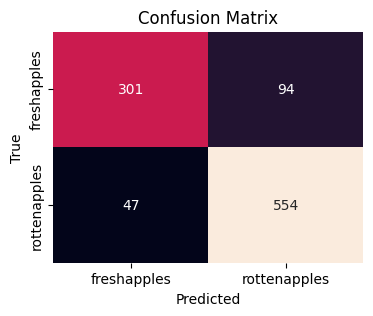

              precision    recall  f1-score   support

 freshapples       0.86      0.76      0.81       395
rottenapples       0.85      0.92      0.89       601

    accuracy                           0.86       996
   macro avg       0.86      0.84      0.85       996
weighted avg       0.86      0.86      0.86       996



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np, seaborn as sns

y_true = val_gen.classes
y_prob = model.predict(val_gen, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=CLASSES, yticklabels=CLASSES)
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

print(classification_report(y_true, y_pred, target_names=CLASSES))
